<a href="https://colab.research.google.com/github/rll/deepul/blob/master/demos/lecture7_selfsupervised_demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

[Course Webpage](https://sites.google.com/view/berkeley-cs294-158-sp20/home)

[1] Pathak, Deepak, et al. "Context encoders: Feature learning by inpainting." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

[2] Gidaris, Spyros, Praveer Singh, and Nikos Komodakis. "Unsupervised representation learning by predicting image rotations." arXiv preprint arXiv:1803.07728 (2018).

[3] Chen, Ting, et al. "A simple framework for contrastive learning of visual representations." arXiv preprint arXiv:2002.05709 (2020).

[4] Noroozi, Mehdi, and Paolo Favaro. "Unsupervised learning of visual representations by solving jigsaw puzzles." European Conference on Computer Vision. Springer, Cham, 2016.

[5] Wang, Xiaolong, Allan Jabri, and Alexei A. Efros. "Learning correspondence from the cycle-consistency of time." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2019.

[6] Oord, Aaron van den, Yazhe Li, and Oriol Vinyals. "Representation learning with contrastive predictive coding." arXiv preprint arXiv:1807.03748 (2018).

[7] Hénaff, Olivier J., et al. "Data-efficient image recognition with contrastive predictive coding." arXiv preprint arXiv:1905.09272 (2019).

[8] Tian, Yonglong, Dilip Krishnan, and Phillip Isola. "Contrastive multiview coding." arXiv preprint arXiv:1906.05849 (2019).

[9] He, Kaiming, et al. "Momentum contrast for unsupervised visual representation learning." arXiv preprint arXiv:1911.05722 (2019).

[10] Doersch, Carl, Abhinav Gupta, and Alexei A. Efros. "Unsupervised visual representation learning by context prediction." Proceedings of the IEEE International Conference on Computer Vision. 2015.

[11] Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

# Getting Started
Go to **Runtime -> Change runtime type** and make sure **Hardward accelerator** is set to **GPU**

In [1]:
!if [ -d cs294-158-ssl ]; then rm -Rf cs294-158-ssl; fi
!git clone https://github.com/wilson1yan/cs294-158-ssl
!pip install cs294-158-ssl/

import os
os.chdir('cs294-158-ssl')

Cloning into 'cs294-158-ssl'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 611 (delta 115), reused 119 (delta 53), pack-reused 422
Receiving objects: 100% (611/611), 3.11 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (424/424), done.
Processing ./cs294-158-ssl
  Preparing metadata (setup.py) ... done
  Created wheel for deepul-helper: filename=deepul_helper-0.1.0-py3-none-any.whl size=25298 sha256=40727d4dcc44834a5f73bbbb00f90a216ce76efe23d6370ced038241b3c8be69
  Stored in directory: /root/.cache/pip/wheels/e3/df/97/281e32d717214451862e0e558746de423b9ef530b7376421e2
Successfully built deepul-helper


Run the cells below to download the necessary pretrained models. It should take a few minutes.

In [2]:
"""
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk" -O data.zip && rm -rf /tmp/cookies.txt
!unzip -qq data.zip
!rm data.zip
"""

'\n!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \'https://docs.google.com/uc?export=download&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk\' -O- | sed -rn \'s/.*confirm=([0-9A-Za-z_]+).*/\x01\n/p\')&id=1_3pQdiYZCI-Jybdjj_54OQZmclbddNBk" -O data.zip && rm -rf /tmp/cookies.txt\n!unzip -qq data.zip\n!rm data.zip\n'

In [3]:
"""
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J" -O results.zip && rm -rf /tmp/cookies.txt
!unzip -qq results.zip
!rm results.zip
"""

'\n!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \'https://docs.google.com/uc?export=download&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J\' -O- | sed -rn \'s/.*confirm=([0-9A-Za-z_]+).*/\x01\n/p\')&id=1GPQoG4r_zLyOzYrY-YUTl-6EUkCsb99J" -O results.zip && rm -rf /tmp/cookies.txt\n!unzip -qq results.zip\n!rm results.zip\n'

The models and demos shown were pre-trained. The code used for all the demos can be found in the github repo [here](https://github.com/wilson1yan/cs294-158-ssl). Follow the README to train models on CIFAR10 or ImageNet.

In [4]:
from google.colab import drive
import zipfile

drive.mount('/content/drive')
path = '/content/drive/MyDrive/data/imagenet.zip'
extraction_path = '/content/drive/MyDrive/data'


with zipfile.ZipFile('/content/drive/MyDrive/data/data.zip', 'r') as zip:
    zip.extractall('/content/cs294-158-ssl')

with zipfile.ZipFile('/content/drive/MyDrive/data/results.zip', 'r') as zip:
    zip.extractall('/content/cs294-158-ssl')

"""
imagenet10_extraction_path = '/content/drive/MyDrive/data'
with zipfile.ZipFile('/content/drive/MyDrive/data/imagenet.zip', 'r') as zip:
    zip.extractall(imagenet10_extraction_path)
"""
"""
import shutil
shutil.rmtree('/content/cs294-158-ssl/data')"""

Mounted at /content/drive


"\nimport shutil\nshutil.rmtree('/content/cs294-158-ssl/data')"

# Self-Supervised Learning Tasks
Self-supervised learning is a rapidly growing field, its success largely accelerated by growing compute and the vast amount of unlabeled data available for training. The hope is that by pretraining on specially designed self-supervised tasks, the models would be able to learn semantically meaningful representations to be used for downstream tasks. In the following demos, we will look at a few examples of these self-supervised tasks.

In [5]:
from deepul_helper.demos import load_model_and_data, evaluate_accuracy, display_nearest_neighbors, show_context_encoder_inpainting, evaluate_classifier

%matplotlib inline

## Demo 1: Context Encoder [[1]](https://arxiv.org/abs/1604.07379)

The context encoder structures its self-supervised learning task by inpainting masked images. For example, the figure below shows different masking shapes, such as center masking, random block masking, and segmentation masking. Note that segmentation masking (c) is not purely self-supervised since we would need to train a image segmentation model which requires labels. However, the other two masking schemes (a) and (b) and purely self-supervised.

![](https://drive.google.com/uc?id=1fhzkULYTtyMGUUF2n9dlPayJSdcY5pRv)

More formally, the context encoder optimizes the following reconstruction loss:
$$\mathcal{L}_{rec} = \left\Vert \hat{M} \odot (x - F((1 - \hat{M})\odot x)) \right\Vert^2_2$$
where $\hat{M}$ is the masked region, $x$ is the image, and $F$ is the context encoder that tries to reconstruct the masked portion. In addition to the reconstruction loss, the paper introduces an adversarial loss that encourages more realistic inpaintings.
$$L_{adv} = \max_D \mathbb{E}_{x\in \chi} [\log(D(x)) + \log(1 - D(F((1-\hat{M})\odot x)))]$$
However, this demo does not use the adversarial portion of the loss.

### Example Code

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class ContextEncoder(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes):
        super().__init__()
        input_channels = 3

        self.latent_dim = 4000

        # Encodes the masked image
        self.encoder = nn.Sequential(
            # 128 x 128 Input
            nn.Conv2d(input_channels, 64, 4, stride=2, padding=1), # 64 x 64
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64, 4, stride=2, padding=1), # 32 x 32
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1), # 16 x 16
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1), # 8 x 8
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, stride=2, padding=1), # 4 x 4
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, self.latent_dim, 4) # 1 x 1
        )

        # Only reconstructs the masked part of the image and not the whole image
        self.decoder = nn.Sequential(
           nn.BatchNorm2d(self.latent_dim),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(self.latent_dim, 512, 4, stride=1, padding=0), # 4 x 4
           nn.BatchNorm2d(512),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1), # 8 x 8
           nn.BatchNorm2d(256),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1), # 16 x 16
           nn.BatchNorm2d(128),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1), # 32 x 32
           nn.BatchNorm2d(64),
           nn.ReLU(inplace=True),
           nn.ConvTranspose2d(64, input_channels, 4, stride=2, padding=1), # 64 x 64
           nn.Tanh()
        )

        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.BatchNorm1d(self.latent_dim, affine=False),
            nn.Linear(self.latent_dim, self.n_classes)
        )
        return classifier

    def forward(self, images):
        # Extract a 64 x 64 center from 128 x 128 image
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        # Mask out a 64 x 64 center with slight overlap
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        return dict(Loss=F.mse_loss(center_recon, images_center)), torch.flatten(z, 1)

    def encode(self, images):
        images_masked = images
        images_masked[:, 0, 32+4:32+64-4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64-4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64-4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0
        return self.encoder(images_masked)

    def reconstruct(self, images):
        images_center = images[:, :, 32:32+64, 32:32+64].clone()
        images_masked = images.clone()
        images_masked[:, 0, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 117.0/255.0 - 1.0
        images_masked[:, 1, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 104.0/255.0 - 1.0
        images_masked[:, 2, 32+4:32+64 - 4, 32+4:32+64-4] = 2 * 123.0/255.0 - 1.0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_recon = images_masked.clone()
        images_recon[:, :, 32:32+64, 32:32+64] = center_recon
        return images_masked, images_recon


### Inpainting Examples
For each pair of images, the left image is the masked input and the right the inpainted reconstruction.

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


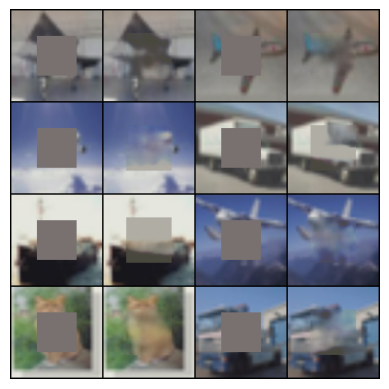

In [7]:
show_context_encoder_inpainting()

### Linear Classification
By design the model architecture is an encoder -> decoder module. We can use the bottleneck layer as our learned representation. Below, we show linear classification accuracy results on CIFAR10 using the learned representations.

In [8]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('context_encoder')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 53.236, Top 5 Accuracy: 94.094

Test Set
Top 1 Accuracy: 45.77, Top 5 Accuracy: 90.29



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


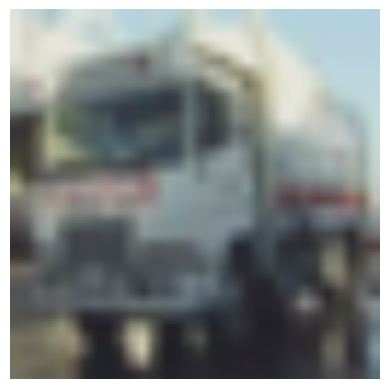

Top 16 Nearest Neighbors (in latent space)


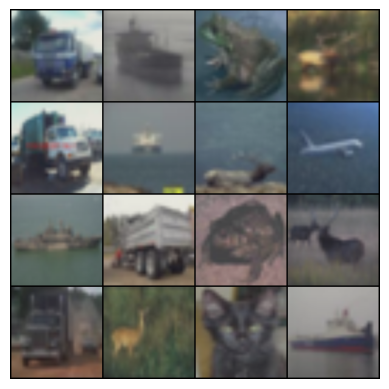

Image 2


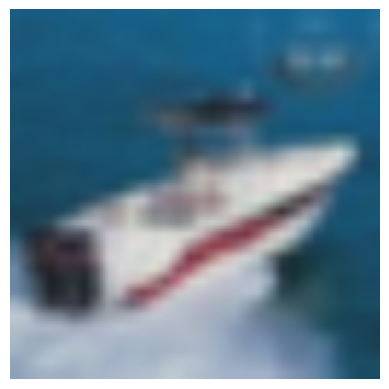

Top 16 Nearest Neighbors (in latent space)


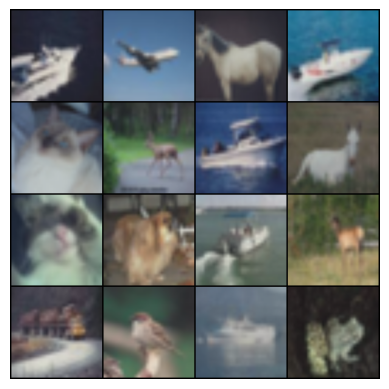

Image 3


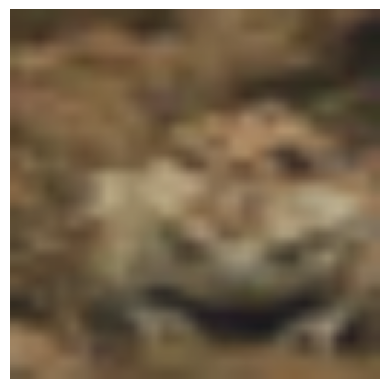

Top 16 Nearest Neighbors (in latent space)


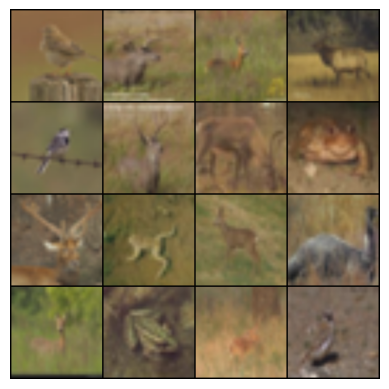

Image 4


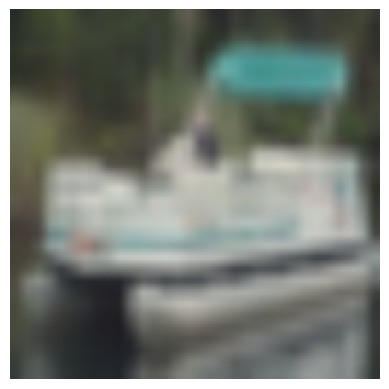

Top 16 Nearest Neighbors (in latent space)


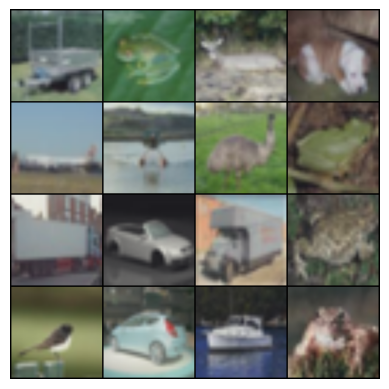

In [9]:
display_nearest_neighbors('context_encoder', model, test_loader)

## Demo 2: Rotation Prediction [[2]](https://arxiv.org/abs/1803.07728)

In this paper, the authors show that accurately predicting the degrees of rotation in images is a self-supervised learning task that learns good representations for downstream tasks.

![](https://drive.google.com/uc?id=1eHXLH-N_6uMGRzdf1Wjnga26qlS5-FRv)

More specifically, the authors showed that training a common CNN architecture (AlexNet, ResNet) on the rotation task learns semantically interpretable convolutional masks similar to those learned in supervised learning.

### Example Code

In [10]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F


class RotationPrediction(nn.Module):
    metrics = ['Loss', 'Acc1']
    metrics_fmt = [':.4e', ':6.2f']

    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'cifar10':
            self.model = NetworkInNetwork()
            self.latent_dim = 192 * 8 * 8
            self.feat_layer = 'conv2'
        elif 'imagenet' in dataset:
            self.model = AlexNet()
            self.latent_dim = 256 * 13 * 13
            self.feat_layer = 'conv5'
        else:
            raise Exception('Unsupported dataset:', dataset)
        self.dataset = dataset
        self.n_classes = n_classes

    def construct_classifier(self):
        if self.dataset == 'cifar10':
            classifier = nn.Sequential(
                Flatten(),
                nn.BatchNorm1d(self.latent_dim, affine=False),
                nn.Linear(self.latent_dim, self.n_classes)
            )
        elif 'imagenet' in self.dataset:
            classifier = nn.Sequential(
                nn.AdaptiveMaxPool2d((6, 6)),
                nn.BatchNorm2d(256, affine=False),
                Flatten(),
                nn.Linear(256 * 6 * 6, self.n_classes)
            )
        else:
            raise Exception('Unsupported dataset:', dataset)
        return classifier

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.get_device())

        logits, zs = self.model(images, out_feat_keys=('classifier', self.feat_layer))
        loss = F.cross_entropy(logits, targets)

        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc), zs[:batch_size]

    def encode(self, images):
        zs = self.model(images, out_feat_keys=(self.feat_layer,))
        return zs

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

### Linear Classification
We can use the feature maps in the later convolutional layers of the pretrained model as our learned representation for linear classification.

In [11]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('rotation')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 79.422, Top 5 Accuracy: 99.076

Test Set
Top 1 Accuracy: 79.91, Top 5 Accuracy: 99.12



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


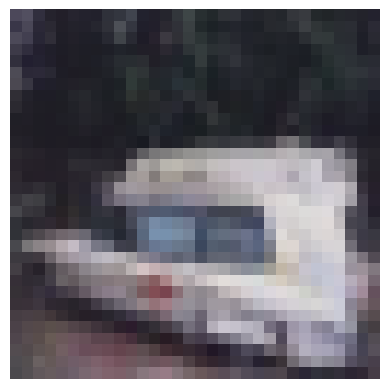

Top 16 Nearest Neighbors (in latent space)


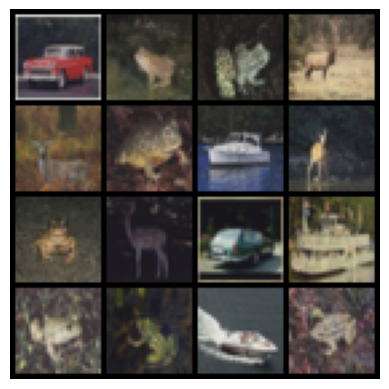

Image 2


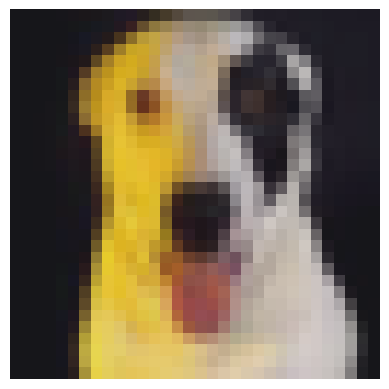

Top 16 Nearest Neighbors (in latent space)


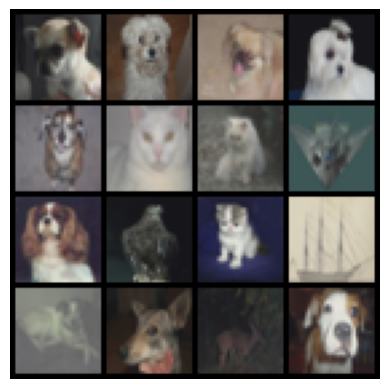

Image 3


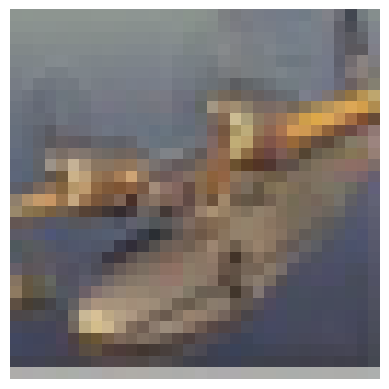

Top 16 Nearest Neighbors (in latent space)


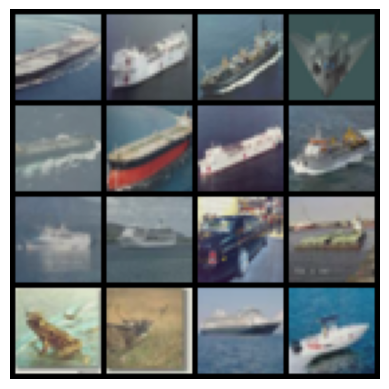

Image 4


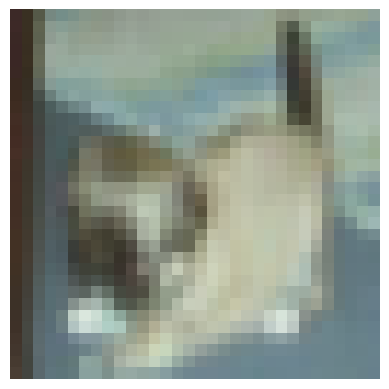

Top 16 Nearest Neighbors (in latent space)


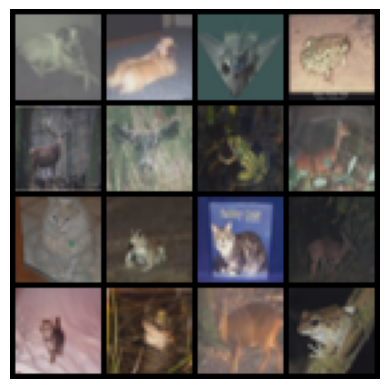

In [12]:
display_nearest_neighbors('rotation', model, test_loader)

## Demo 3: SimCLR [[3]](https://arxiv.org/abs/2002.05709)

SimCLR is a contrastive learning framework to learn strong visual representations. An image $x$ is processed using data augmentation to produce two variants $x_i$ and $x_j$ which are both fed into encoder $f$ (a CNN) and projection head $g$ (a small MLP). The models optimize a contrastive loss to maximally align projected latents $z_i, z_j$. We consider $x_i, x_j$ as a positive pair, and any other $x_i, x_k$ pairs (i.e. different images in the same batch) are negative pairs. A visual diagram of the training procedure is shown below (from the paper).

![](https://drive.google.com/uc?id=1XW1uIkUTMSa0DZncivSYXzM5gA5FIhF6)

More formally, the loss between positive example $z_i, z_j$ is:
$$\ell_{i,j} = -\log{\frac{\exp(\text{sim}(z_i, z_j)/\tau)}{\sum_{k=1}^{2N}\mathbb{1}_{[k\neq i]}\exp(\text{sim}(z_i, z_k)/\tau)}}$$
where $\text{sim}(z_i, z_j) = z_i^Tz_j / (\left\Vert z_i \right\Vert \left\Vert z_j \right\Vert)$. The loss function can also be interpreted as a standard cross entropy loss to classify positive samples where logits are constructed using a given similarity function.

Note: A common idea in contrastive learning methods is that a larger batch means more negative samples. Therefore, these methods usually benefit the most from large-batch learning compared to other self-supervised learning tasks.

### Example Code

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

# Some code adapted from https://github.com/sthalles/SimCLR
class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset, n_classes, dist=None):
        super().__init__()
        self.temperature = 0.5
        self.projection_dim = 128

        if dataset == 'cifar10':
            resnet = resnet_v1((3, 32, 32), 50, 1, cifar_stem=True)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        elif 'imagenet' in dataset:
            resnet = resnet_v1((3, 128, 128), 50, 1, cifar_stem=False)
            if dist is not None:
                resnet = nn.SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048

        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dataset = dataset
        self.n_classes = n_classes
        self.dist = dist

    def construct_classifier(self):
        return nn.Sequential(nn.Linear(self.latent_dim, self.n_classes))

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images
        hi, hj = self.encode(xi), self.encode(xj) # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj) # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Each training example has 2N - 2 negative samples
        # 2N total samples, but exclude the current and positive sample

        if self.dist is None:
            zis = [zi]
            zjs = [zj]
        else:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]

            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0) # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0) # (2N * n_gpus, projection_dim)

        sim_matrix = torch.mm(z1, z2.t()) # (2N, 2N * n_gpus)
        sim_matrix = sim_matrix / self.temperature
        # Mask out same-sample terms
        n_gpus = 1 if self.dist is None else self.dist.get_world_size()
        rank = 0 if self.dist is None else self.dist.get_rank()
        sim_matrix[torch.arange(n), torch.arange(rank*n, (rank+1)*n)]  = -float('inf')
        sim_matrix[torch.arange(n, 2*n), torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n)] = -float('inf')

        targets = torch.cat((torch.arange((n_gpus+rank)*n, (n_gpus+rank+1)*n),
                             torch.arange(rank*n, (rank+1)*n)), dim=0)
        targets = targets.to(sim_matrix.get_device()).long()

        loss = F.cross_entropy(sim_matrix, targets, reduction='sum')
        loss = loss / n
        return dict(Loss=loss), hi

    def encode(self, images):
        return self.resnet(images[0])

    def get_features(self, images):
        return self.resnet.get_features(images)


### Linear Classification
We can use the encoded vector $h_i$ as our latent representation.

In [14]:
model, linear_classifier, train_loader, test_loader = load_model_and_data('simclr')
evaluate_accuracy(model, linear_classifier, train_loader, test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Set
Top 1 Accuracy: 89.912, Top 5 Accuracy: 99.466

Test Set
Top 1 Accuracy: 92.84, Top 5 Accuracy: 99.86



### Nearest Neighbors
Another way to evaluate our learned representation is to look at nearest neighbors to random encoded images in latent space.

Image 1


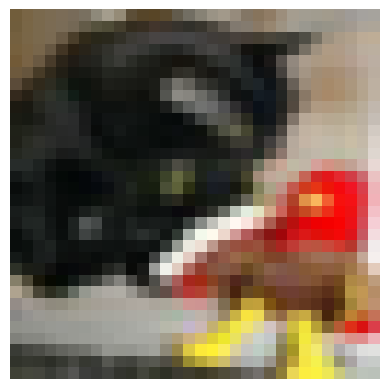

Top 16 Nearest Neighbors (in latent space)


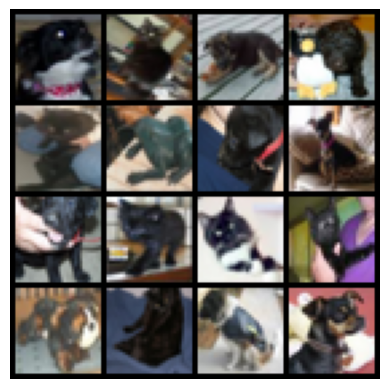

Image 2


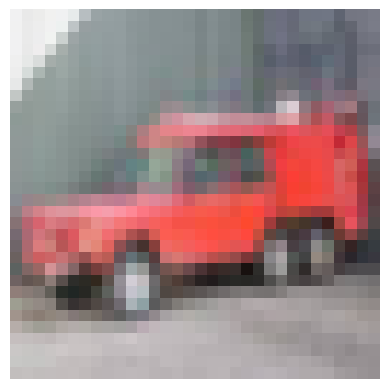

Top 16 Nearest Neighbors (in latent space)


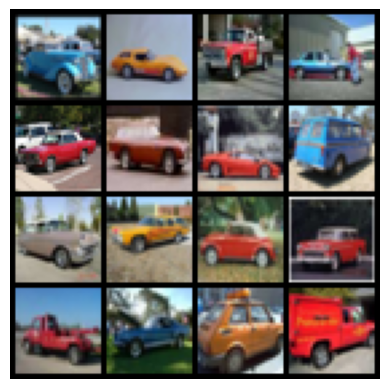

Image 3


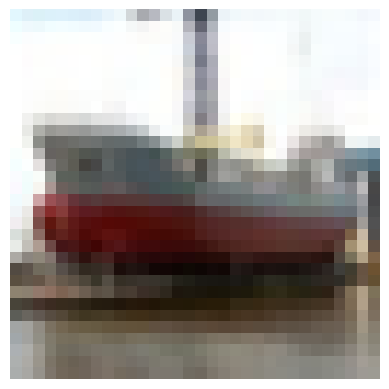

Top 16 Nearest Neighbors (in latent space)


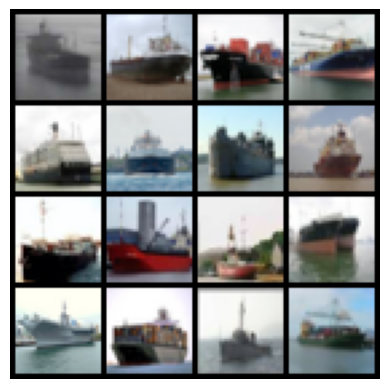

Image 4


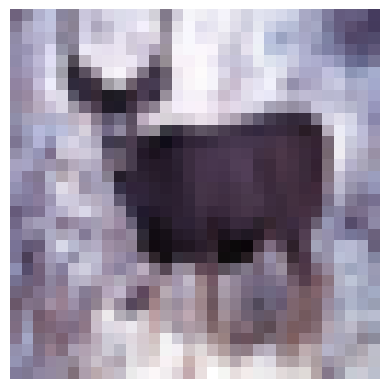

Top 16 Nearest Neighbors (in latent space)


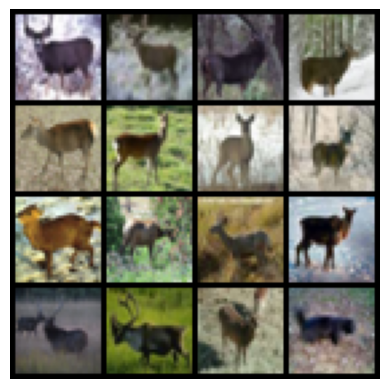

In [15]:
display_nearest_neighbors('simclr', model, test_loader)

In [16]:
import shutil
from glob import glob

#Splitting the dataset into train, validation and test folders
imagenet_path = '/content/cs294-158-ssl/data/imagenet10'

train_path = os.path.join(imagenet_path, 'train')
val_path = os.path.join(imagenet_path, 'val')

#os.mkdir('/content/cs294-158-ssl/data')
os.mkdir('/content/cs294-158-ssl/data/imagenet10')

if os.path.isdir(train_path):
    shutil.rmtree(train_path)
os.mkdir(train_path)

if os.path.isdir(val_path):
    shutil.rmtree(val_path)
os.mkdir(val_path)


for subdir in os.listdir('/content/drive/MyDrive/data/training'):
    dir = os.path.join('/content/drive/MyDrive/data/training', subdir)
    if os.path.isdir(dir):
        os.mkdir(os.path.join(imagenet_path, 'train', subdir))
        os.mkdir(os.path.join(imagenet_path, 'val', subdir))
        files = glob(os.path.join(dir, '*.JPEG'))
        nb_train = int(0.7 * len(files))
        nb_val = int((len(files) - nb_train) / 2)

        for train_file in files[:nb_train]:
            src = os.path.join(dir, train_file)
            dst = os.path.join(imagenet_path, 'train', subdir)
            shutil.copy(src, dst)

        for val_file in files[nb_train:nb_train+nb_val]:
            src = os.path.join(dir, val_file)
            dst = os.path.join(imagenet_path, 'val', subdir)
            shutil.copy(src, dst)

In [17]:
#Training
!pip install warmup-scheduler
!python train_self_supervised_task.py -d imagenet10 -t context_encoder -b 16 -e 5 --lr 1e-3 --o adam
!python train_self_supervised_task.py -d imagenet10 -t rotation -b 16 -e 5 --lr 1e-3 --o adam
!python train_self_supervised_task.py -d imagenet10 -t simclr -b 16 -e 5 --lr 1e-3 --o adam

  Preparing metadata (setup.py) ... done
  Created wheel for warmup-scheduler: filename=warmup_scheduler-0.3-py3-none-any.whl size=2969 sha256=26fc38793f897e1942d948e5b721eb3f125b7c9bcd9bcbce4e2970ebfe12b3db
  Stored in directory: /root/.cache/pip/wheels/59/01/9e/d1820991c32916e9808c940f572b462f3e46427f3e76c4d852
Successfully built warmup-scheduler
Starting process on GPU: 0
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[W reducer.cpp:1346] Warning: find_unused_parameters=True was specified in DDP constructor, but did not find any unused parameters in the forward 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


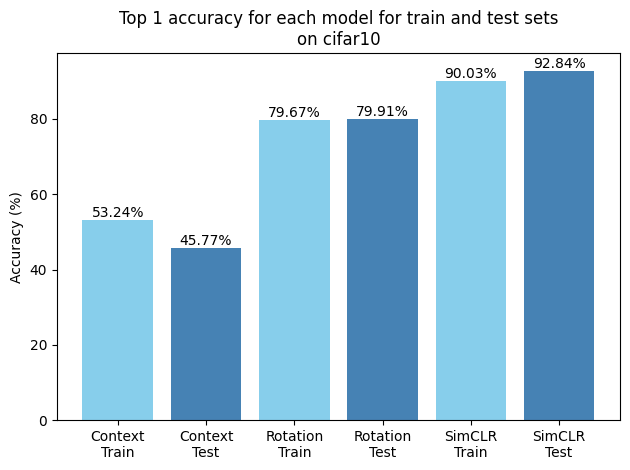

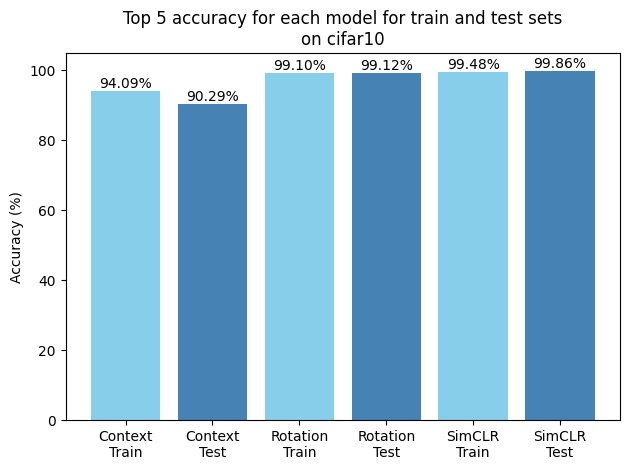

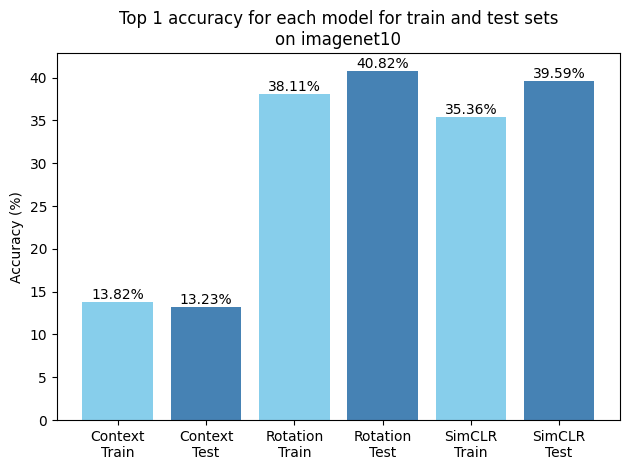

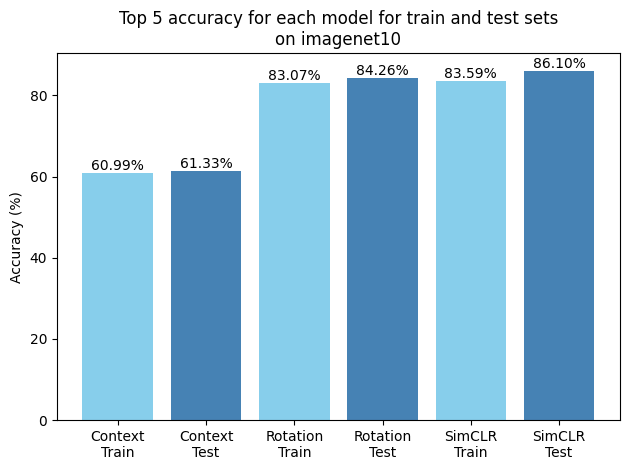

In [79]:
import matplotlib.pyplot as plt

#Evaluation and results display
def plot_results(values, labels, i, dataset_name):
    colors = ['skyblue', 'steelblue'] * 3
    plt.figure()
    bars = plt.bar(labels, values, color=colors)
    plt.bar_label(bars, fmt='%.2f%%', padding=0)
    plt.title(f"Top {i} accuracy for each model for train and test sets\non {dataset_name}")
    plt.ylabel("Accuracy (%)")
    plt.tight_layout()
    plt.show()

def plot_evaluation(dataset):
    context_model, context_linear_classifier, context_train_loader, context_test_loader = load_model_and_data('context_encoder', dataset)
    rotation_model, rotation_linear_classifier, rotation_train_loader, rotation_test_loader = load_model_and_data('rotation', dataset)
    simclr_model, simclr_linear_classifier, simclr_train_loader, simclr_test_loader = load_model_and_data('simclr', dataset)

    context_train_acc1, context_train_acc5 = evaluate_classifier(context_model, context_linear_classifier, context_train_loader)
    context_test_acc1, context_test_acc5 = evaluate_classifier(context_model, context_linear_classifier, context_test_loader)

    rotation_train_acc1, rotation_train_acc5 = evaluate_classifier(rotation_model, rotation_linear_classifier, rotation_train_loader)
    rotation_test_acc1, rotation_test_acc5 = evaluate_classifier(rotation_model, rotation_linear_classifier, rotation_test_loader)

    simclr_train_acc1, simclr_train_acc5 = evaluate_classifier(simclr_model, simclr_linear_classifier, simclr_train_loader)
    simclr_test_acc1, simclr_test_acc5 = evaluate_classifier(simclr_model, simclr_linear_classifier, simclr_test_loader)

    values_acc1 = [context_train_acc1, context_test_acc1,
                  rotation_train_acc1, rotation_test_acc1,
                  simclr_train_acc1, simclr_test_acc1]

    values_acc5 = [context_train_acc5, context_test_acc5,
                  rotation_train_acc5, rotation_test_acc5,
                  simclr_train_acc5, simclr_test_acc5]

    labels = ['Context\nTrain', 'Context\nTest',
              'Rotation\nTrain', 'Rotation\nTest',
              'SimCLR\nTrain', 'SimCLR\nTest']

    plot_results(values_acc1, labels, 1, dataset)
    plot_results(values_acc5, labels, 5, dataset)

plot_evaluation('cifar10')
plot_evaluation('imagenet10')


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import torch.optim as optim
import os
from PIL import Image
from copy import deepcopy

In [20]:
#Dual network to predict the position of a patch in respect to another
class patch_classifier(nn.Module):
    def __init__(self, dataset):
        super().__init__()
        if dataset  == 'cifar10':
            self.dual_net = nn.Sequential(#10
                nn.Conv2d(3, 8, kernel_size=3, padding=2),#10
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3),#8
                nn.Conv2d(8, 16, kernel_size=5, padding=2),#8
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3),#6
                nn.Conv2d(16, 32, kernel_size=3, padding=1),#5
                nn.ReLU(),
                nn.AdaptiveAvgPool2d((5, 5)),
                nn.Flatten()
            )
            self.classifier = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(32 * 5 * 5 * 2, 512),
                nn.ReLU(),
                nn.Linear(512, 8)
            )
        elif dataset == 'imagenet10':
            self.dual_net = nn.Sequential(#70
                nn.Conv2d(3, 16, kernel_size=7, stride=2, padding=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2),
                nn.Conv2d(16, 32, kernel_size=5, padding=2),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=3, stride=2),#5
                nn.Conv2d(32, 64, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.AdaptiveAvgPool2d((5, 5)),
                nn.Flatten()
            )
            self.classifier = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(64 * 5 * 5 * 2, 1024),
                nn.ReLU(),
                nn.Linear(1024, 8)
            )

    def forward(self, x1, x2):
        x1 = self.dual_net(x1)
        x2 = self.dual_net(x2)
        vec = torch.cat((x1, x2), dim=1)
        output = self.classifier(vec)
        return output


"""
model = patch_classifier('imagenet10')
dummy1 = torch.randn(2, 3, 70, 70)
dummy2 = torch.randn(2, 3, 70, 70)
output = model(dummy1, dummy2)
print(output.shape)"""

"\nmodel = patch_classifier('imagenet10')\ndummy1 = torch.randn(2, 3, 70, 70)\ndummy2 = torch.randn(2, 3, 70, 70)\noutput = model(dummy1, dummy2)\nprint(output.shape)"

In [21]:
#Custom dataset that returns (patch1, patch2, label)
class PatchDataset(Dataset):
    def __init__(self, dataset, transform=transforms.ToTensor()):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        patch_list, _ = self.dataset[idx]
        central_patch = patch_list[0]
        random_patch, random_patch_class = patch_list[random.choice([1,2,3,4,5,6,7,8])]

        central_patch = self.transform(central_patch)
        random_patch = self.transform(random_patch)

        return central_patch, random_patch, random_patch_class

In [22]:
#Custom transform to convert PIL to numpy
class PILToNumpy:
    def __call__(self, pil_image):
        return np.array(pil_image)

#Custom transform to return patches and a label
class GetPatches:
    def __init__(self, dataset_name):
        self.dataset_name = dataset_name

    def classes_dict(self):
        classes = dict()
        ind = 0
        for i in range(0,3):
            for j in range(0,3):
                if i != 1 or j != 1:
                    classes[(j,i)] = ind
                    ind += 1
        return classes

    def patch(self, coords, image, patch_size, gap_size):
        xmin, ymin = coords[0] * (patch_size + gap_size), coords[1] * (patch_size + gap_size)
        return image[ymin:ymin+patch_size, xmin:xmin+patch_size]

    def patch_creation(self, image):
        patch_size = 70 if self.dataset_name == 'imagenet10' else 10
        gap_size = 15 if self.dataset_name == 'imagenet10' else 1

        central_patch = self.patch((1,1), image, patch_size, gap_size)
        central_patch = Image.fromarray(central_patch)

        patches = [central_patch]
        classes = self.classes_dict()

        for key in list(classes.keys()):
            border_patch_x, border_patch_y = key
            border_patch = self.patch((border_patch_x, border_patch_y), image, patch_size, gap_size)
            border_patch = Image.fromarray(border_patch)
            border_patch_class = classes[(border_patch_x, border_patch_y)]
            patches.append((border_patch, border_patch_class))

        return patches

    def __call__(self, np_image):
        return self.patch_creation(np_image)


get_patches_cifar10 = GetPatches('cifar10')
patch_transform_cifar10 = transforms.Compose([
    PILToNumpy(),
    get_patches_cifar10
])

get_patches_imagenet10 = GetPatches('imagenet10')
patch_transform_imagenet10 = transforms.Compose([
    transforms.Resize((256, 256)),
    PILToNumpy(),
    get_patches_imagenet10
])

In [26]:
batch_size = 1024

train_set_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=patch_transform_cifar10)
train_set_size_cifar10 = int(0.7*len(train_set_cifar10))
validation_set_size_cifar10 = len(train_set_cifar10) - train_set_size_cifar10
train_set_cifar10, val_set_cifar10 = torch.utils.data.random_split(train_set_cifar10, [train_set_size_cifar10, validation_set_size_cifar10])
#test_set_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=patch_transform_cifar10)


train_set_cifar10 = PatchDataset(train_set_cifar10)
val_set_cifar10 = PatchDataset(val_set_cifar10)
#test_set_cifar10 = PatchDataset(test_set_cifar10)


train_loader_cifar10 = torch.utils.data.DataLoader(train_set_cifar10, batch_size=batch_size, shuffle=True)
val_loader_cifar10 = torch.utils.data.DataLoader(val_set_cifar10, batch_size=batch_size, shuffle=True)
#test_loader_cifar10 = torch.utils.data.DataLoader(test_set_cifar10, batch_size=batch_size, shuffle=False)



imagenet10_extraction_path = '/content/drive/MyDrive/data'
root_folder = os.path.join(imagenet10_extraction_path, 'training')

train_set_imagenet10 = torchvision.datasets.ImageFolder(root=root_folder, transform=patch_transform_imagenet10)
train_set_size_imagenet10 = int(0.7*len(train_set_imagenet10))
validation_set_size_imagenet10 = len(train_set_imagenet10) - train_set_size_imagenet10
train_set_imagenet10, val_set_imagenet10 = torch.utils.data.random_split(train_set_imagenet10, [train_set_size_imagenet10, validation_set_size_imagenet10])
#test_set_imagenet10 = torchvision.datasets.ImageFolder(root=root_folder, transform=patch_transform_imagenet10)

train_set_imagenet10 = PatchDataset(train_set_imagenet10)
val_set_imagenet10 = PatchDataset(val_set_imagenet10)
#test_set_imagenet10 = PatchDataset(test_set_imagenet10)

train_loader_imagenet10 = torch.utils.data.DataLoader(train_set_imagenet10, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader_imagenet10 = torch.utils.data.DataLoader(val_set_imagenet10, batch_size=batch_size, shuffle=True, num_workers=2)
#test_loader_imagenet10 = torch.utils.data.DataLoader(test_set_imagenet10, batch_size=batch_size, shuffle=False, num_workers=2)


print(len(train_set_cifar10))
print(len(val_set_cifar10))
#print(len(test_set))

Files already downloaded and verified
35000
15000


In [32]:
print(len(train_set_imagenet10))
print(len(val_set_imagenet10))

9100
3900


In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def pretext_training(train_loader, val_loader, dataset):

    model = patch_classifier(dataset)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    number_epochs = 10


    training_losses = []
    validation_losses = []
    for epoch in range(number_epochs):
        print("Starting epoch number " + str(epoch))

        training_loss = 0
        model.train()

        for i, (central_patches, neighbour_patches, labels) in enumerate(tqdm(train_loader)):
            central_patches = central_patches.to(device)
            neighbour_patches = neighbour_patches.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(central_patches, neighbour_patches)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.cpu().item() / len(train_loader)

        print("At epoch #" + str(epoch) + ", loss = " + str(training_loss))
        training_losses.append(training_loss)

        validation_loss = 0
        model.eval()

        with torch.no_grad():
            for i, (central_patches, neighbour_patches, labels) in enumerate(tqdm(val_loader)):
                central_patches = central_patches.to(device)
                neighbour_patches = neighbour_patches.to(device)
                labels = labels.to(device)

                outputs = model(central_patches, neighbour_patches)
                loss = criterion(outputs, labels)
                validation_loss += loss.cpu().item() / len(val_loader)

        print("At epoch #" + str(epoch) + ", validation loss = " + str(validation_loss))
        validation_losses.append(validation_loss)

        if epoch > 0:
            plt.figure()
            plt.plot(np.arange(len(training_losses)), training_losses)
            plt.plot(np.arange(len(validation_losses)), validation_losses)
            plt.show()

        torch.save(model.state_dict(), os.path.join('data', 'pretext' + dataset + str(epoch) + 'epochs.pth'))

Starting epoch number 0


100%|██████████| 9/9 [01:08<00:00,  7.57s/it]


At epoch #0, loss = 2.0797679954104953


100%|██████████| 4/4 [00:32<00:00,  8.16s/it]


At epoch #0, validation loss = 2.0793341398239136
Starting epoch number 1


100%|██████████| 9/9 [01:13<00:00,  8.13s/it]


At epoch #1, loss = 2.079488727781508


100%|██████████| 4/4 [00:32<00:00,  8.04s/it]


At epoch #1, validation loss = 2.0793099999427795


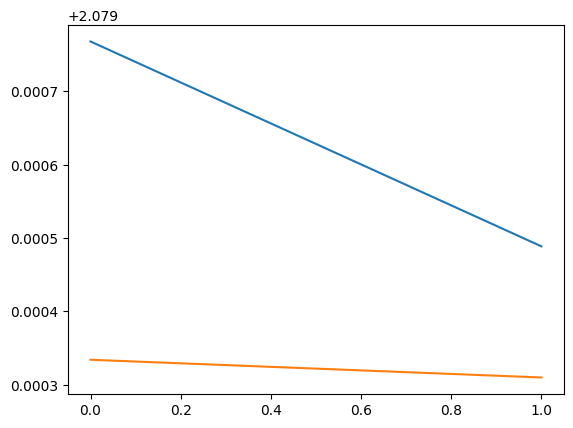

Starting epoch number 2


100%|██████████| 9/9 [01:12<00:00,  8.04s/it]


At epoch #2, loss = 2.079418208864


100%|██████████| 4/4 [00:32<00:00,  8.13s/it]


At epoch #2, validation loss = 2.078652501106262


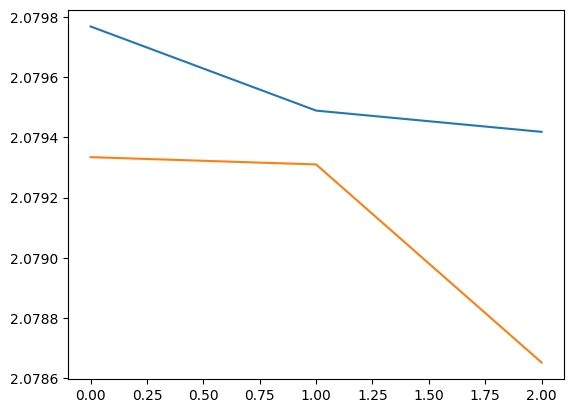

Starting epoch number 3


100%|██████████| 9/9 [01:13<00:00,  8.19s/it]


At epoch #3, loss = 2.078809340794881


100%|██████████| 4/4 [00:32<00:00,  8.12s/it]


At epoch #3, validation loss = 2.078815281391144


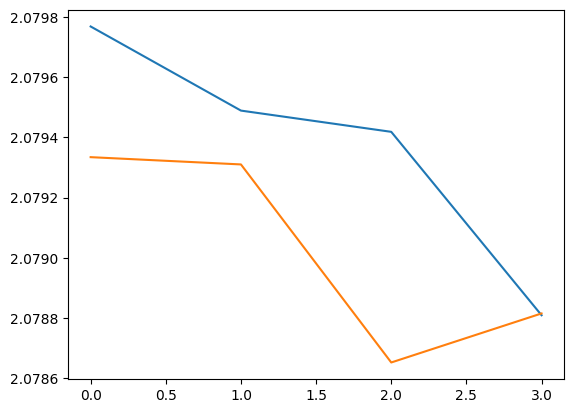

Starting epoch number 4


100%|██████████| 9/9 [01:13<00:00,  8.16s/it]


At epoch #4, loss = 2.0787283844417996


100%|██████████| 4/4 [00:31<00:00,  7.95s/it]


At epoch #4, validation loss = 2.0783788561820984


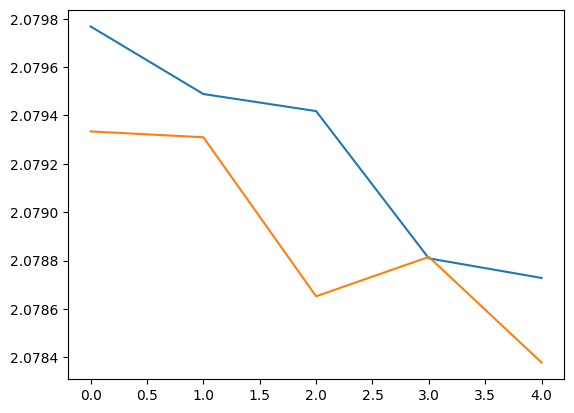

Starting epoch number 5


100%|██████████| 9/9 [01:12<00:00,  8.08s/it]


At epoch #5, loss = 2.0786040094163685


100%|██████████| 4/4 [00:31<00:00,  7.99s/it]


At epoch #5, validation loss = 2.0783031582832336


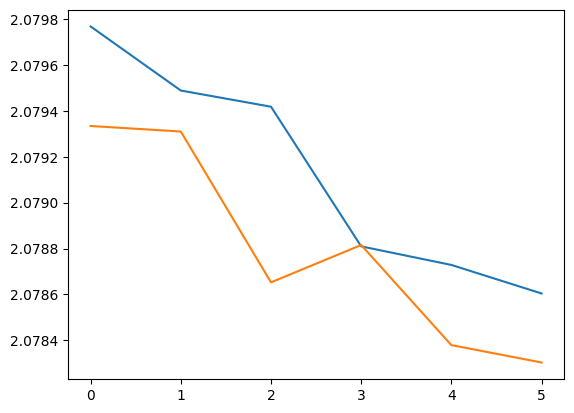

Starting epoch number 6


100%|██████████| 9/9 [01:13<00:00,  8.13s/it]


At epoch #6, loss = 2.0782139831119117


100%|██████████| 4/4 [00:31<00:00,  7.96s/it]


At epoch #6, validation loss = 2.0781020522117615


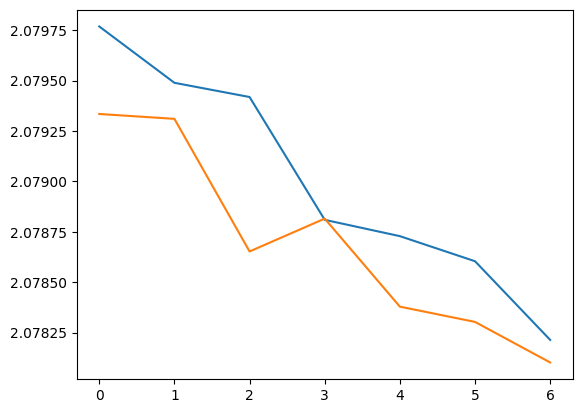

Starting epoch number 7


100%|██████████| 9/9 [01:12<00:00,  8.07s/it]


At epoch #7, loss = 2.0774282084570994


100%|██████████| 4/4 [00:32<00:00,  8.01s/it]


At epoch #7, validation loss = 2.076887547969818


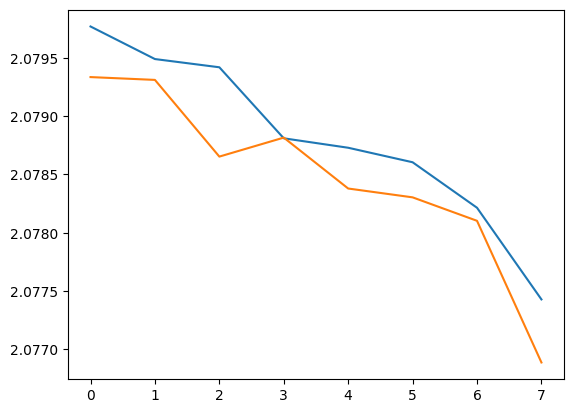

Starting epoch number 8


100%|██████████| 9/9 [01:12<00:00,  8.08s/it]


At epoch #8, loss = 2.077399730682373


100%|██████████| 4/4 [00:32<00:00,  8.05s/it]


At epoch #8, validation loss = 2.076556384563446


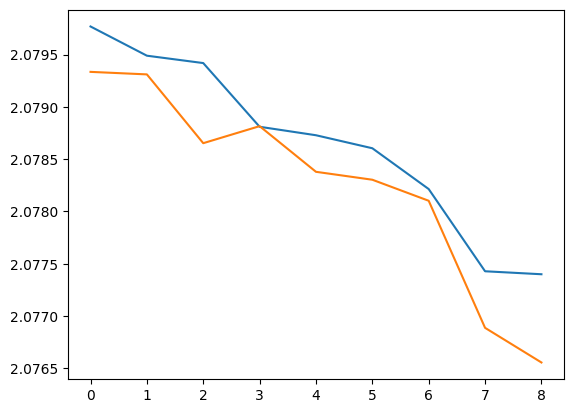

Starting epoch number 9


100%|██████████| 9/9 [01:12<00:00,  8.04s/it]


At epoch #9, loss = 2.076900482177735


100%|██████████| 4/4 [00:32<00:00,  8.11s/it]


At epoch #9, validation loss = 2.0754469633102417


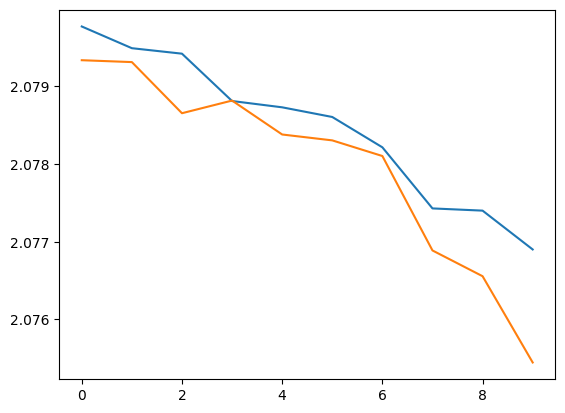

Starting epoch number 0


100%|██████████| 35/35 [00:18<00:00,  1.93it/s]


At epoch #0, loss = 2.0795439311436246


100%|██████████| 15/15 [00:06<00:00,  2.23it/s]


At epoch #0, validation loss = 2.0793776988983157
Starting epoch number 1


100%|██████████| 35/35 [00:17<00:00,  1.98it/s]


At epoch #1, loss = 2.0792426926749097


100%|██████████| 15/15 [00:08<00:00,  1.87it/s]

At epoch #1, validation loss = 2.0792619864145916


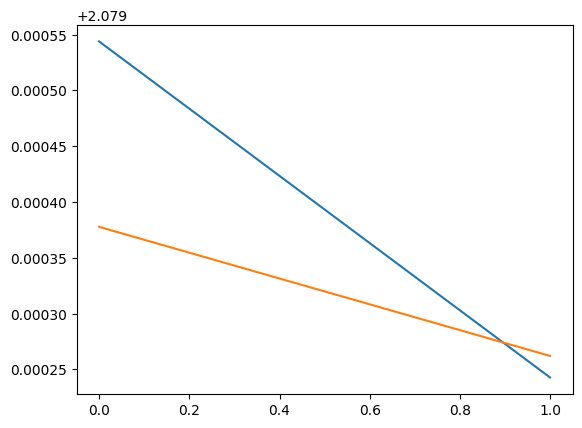

Starting epoch number 2


100%|██████████| 35/35 [00:17<00:00,  1.99it/s]


At epoch #2, loss = 2.0792760372161863


100%|██████████| 15/15 [00:08<00:00,  1.76it/s]


At epoch #2, validation loss = 2.0791876792907713


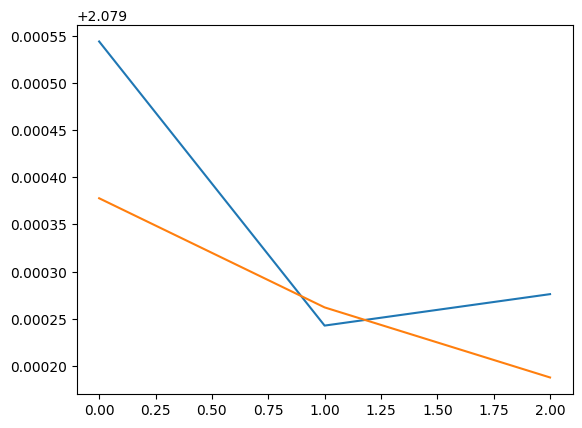

Starting epoch number 3


100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


At epoch #3, loss = 2.079015350341797


100%|██████████| 15/15 [00:07<00:00,  2.00it/s]


At epoch #3, validation loss = 2.0790084997812905


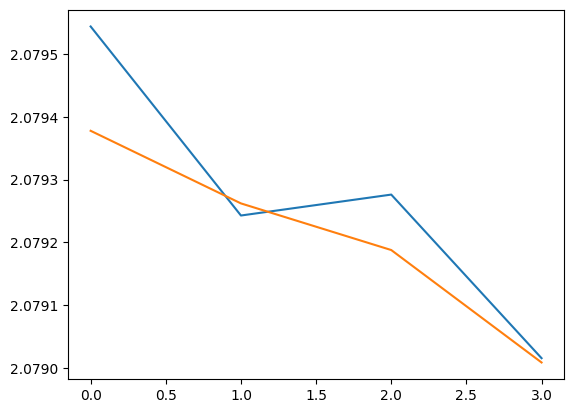

Starting epoch number 4


100%|██████████| 35/35 [00:18<00:00,  1.93it/s]


At epoch #4, loss = 2.0788665771484376


100%|██████████| 15/15 [00:06<00:00,  2.25it/s]


At epoch #4, validation loss = 2.078737004597982


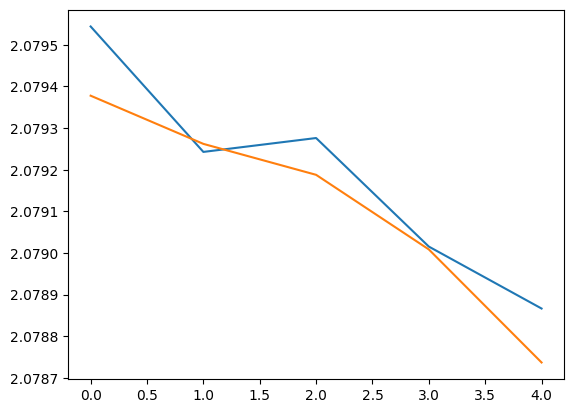

Starting epoch number 5


100%|██████████| 35/35 [00:18<00:00,  1.92it/s]


At epoch #5, loss = 2.078609480176653


100%|██████████| 15/15 [00:07<00:00,  1.90it/s]

At epoch #5, validation loss = 2.0782456239064535


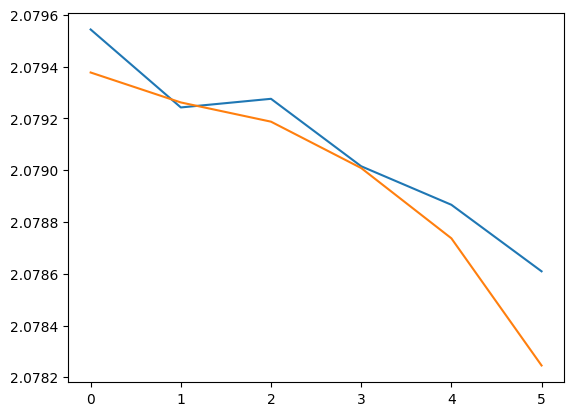

Starting epoch number 6


100%|██████████| 35/35 [00:17<00:00,  1.97it/s]


At epoch #6, loss = 2.078320789337159


100%|██████████| 15/15 [00:08<00:00,  1.77it/s]


At epoch #6, validation loss = 2.0780972798665363


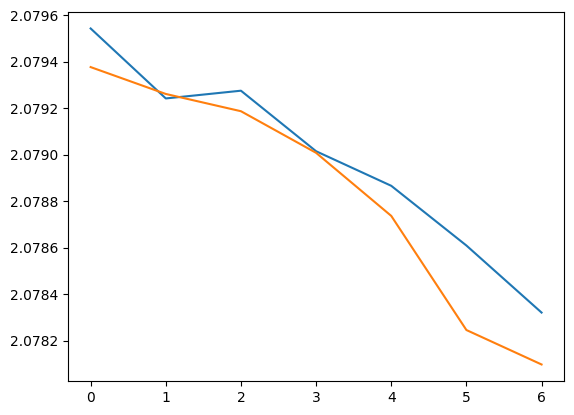

Starting epoch number 7


100%|██████████| 35/35 [00:17<00:00,  1.97it/s]


At epoch #7, loss = 2.077678939274379


100%|██████████| 15/15 [00:07<00:00,  1.89it/s]


At epoch #7, validation loss = 2.0771882851918537


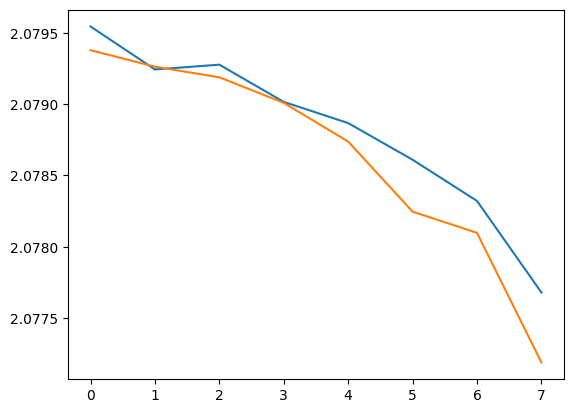

Starting epoch number 8


100%|██████████| 35/35 [00:18<00:00,  1.92it/s]


At epoch #8, loss = 2.0772181238446916


100%|██████████| 15/15 [00:06<00:00,  2.24it/s]


At epoch #8, validation loss = 2.076359637578328


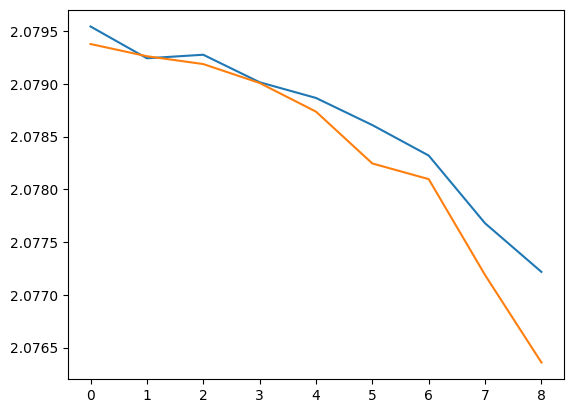

Starting epoch number 9


100%|██████████| 35/35 [00:18<00:00,  1.87it/s]


At epoch #9, loss = 2.0760576861245292


100%|██████████| 15/15 [00:07<00:00,  2.02it/s]

At epoch #9, validation loss = 2.0750695387522375


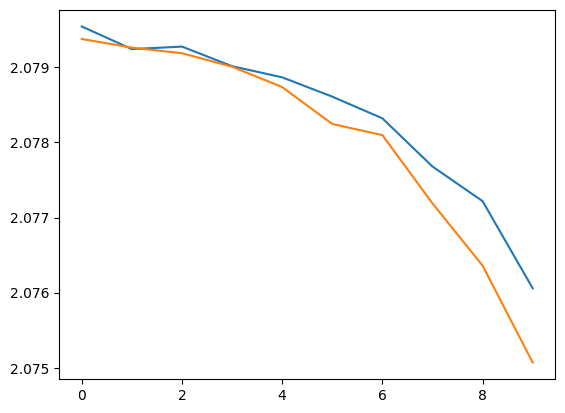

In [31]:
pretext_training(train_loader_imagenet10, val_loader_imagenet10, 'imagenet10')
pretext_training(train_loader_cifar10, val_loader_cifar10, 'cifar10')

In [33]:
#Test on a classification model using the frozen pretrained conv layers from the patch_classifier model
class image_classifier(nn.Module):
    def __init__(self, feature_extractor, dataset):
        super().__init__()
        self.convnet = feature_extractor

        for parameter in self.convnet.parameters():
            parameter.requires_grad = False

        if dataset == 'imagenet10':
            self.classifier = nn.Sequential(
                nn.Linear(64 * 5 * 5, 512),
                nn.ReLU(),
                nn.Linear(512, 10)
            )
        elif dataset == 'cifar10':
            self.classifier = nn.Sequential(
                nn.Linear(32 * 5 * 5, 512),
                nn.ReLU(),
                nn.Linear(512, 10)
            )

    def forward(self, x):
        x = self.convnet(x)
        output = self.classifier(x)
        return output

In [64]:
#Initialize final classification model
patch_classification_model_imagnet10 = patch_classifier('imagenet10')
patch_classification_model_imagnet10.load_state_dict(torch.load('/content/cs294-158-ssl/data/pretextimagenet109epochs.pth'))
model_classification_imagenet10 = image_classifier(patch_classification_model_imagnet10.dual_net, 'imagenet10')

patch_classification_model_cifar10 = patch_classifier('cifar10')
patch_classification_model_cifar10.load_state_dict(torch.load('/content/cs294-158-ssl/data/pretextcifar109epochs.pth'))
model_classification_cifar10 = image_classifier(patch_classification_model_cifar10.dual_net, 'cifar10')

In [65]:
from torch.utils.data import random_split

transform_cifar10 = transforms.Compose([
    transforms.ToTensor()
])

transform_imagenet10 = transforms.Compose([
    transforms.Resize((70,70)),
    transforms.ToTensor()
])

batch_size = 2048

train_set_cifar = torchvision.datasets.CIFAR10(root='./data', train=True , download=True, transform=transform_cifar10)
train_set_size_cifar = int(0.8*len(train_set_cifar))
validation_set_size_cifar = len(train_set_cifar) - train_set_size_cifar
train_set_cifar, val_set_cifar = torch.utils.data.random_split(train_set_cifar, [train_set_size_cifar, validation_set_size_cifar])
test_set_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar10)

train_loader_cifar = torch.utils.data.DataLoader(train_set_cifar, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader_cifar = torch.utils.data.DataLoader(val_set_cifar, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader_cifar = torch.utils.data.DataLoader(test_set_cifar, batch_size=batch_size, shuffle=False, num_workers=0)


imagenet10_extraction_path = '/content/drive/MyDrive/data'
root_folder = os.path.join(imagenet10_extraction_path, 'training')

train_set_imagenet10 = torchvision.datasets.ImageFolder(root=root_folder, transform=transform_imagenet10)
train_set_size_imagenet10 = int(0.7 * len(train_set_imagenet10))
temp_val_set_size = len(train_set_imagenet10) - train_set_size_imagenet10
train_set_imagenet10, temp_val_set = random_split(train_set_imagenet10, [train_set_size_imagenet10, temp_val_set_size])
val_set_size = int(0.5 * len(temp_val_set))
test_set_size = len(temp_val_set) - val_set_size
val_set_imagenet10, test_set_imagenet10 = random_split(temp_val_set, [val_set_size, test_set_size])

train_loader_imagenet10 = torch.utils.data.DataLoader(train_set_imagenet10, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader_imagenet10 = torch.utils.data.DataLoader(val_set_imagenet10, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader_imagenet10 = torch.utils.data.DataLoader(test_set_imagenet10, batch_size=batch_size, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [66]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

def classification_training(train_loader, val_loader, dataset, model):
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.5)
    number_epochs = 10


    training_losses = []
    validation_losses = []
    for epoch in range(number_epochs):
        print("Starting epoch number " + str(epoch))

        training_loss = 0
        model.train()

        for i, (images, labels) in enumerate(tqdm(train_loader)):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.cpu().item() / len(train_loader)

        print("At epoch #" + str(epoch) + ", loss = " + str(training_loss))
        training_losses.append(training_loss)

        validation_loss = 0
        model.eval()

        with torch.no_grad():
            for i, (images, labels) in enumerate(tqdm(val_loader)):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                validation_loss += loss.cpu().item() / len(val_loader)

        print("At epoch #" + str(epoch) + ", validation loss = " + str(validation_loss))
        validation_losses.append(validation_loss)

        if epoch > 0:
            plt.figure()
            plt.plot(np.arange(len(training_losses)), training_losses)
            plt.plot(np.arange(len(validation_losses)), validation_losses)
            plt.show()

        torch.save(model.state_dict(), os.path.join('data', 'classify_' + dataset + str(epoch) + 'epochs.pth'))

Starting epoch number 0


100%|██████████| 20/20 [00:08<00:00,  2.26it/s]


At epoch #0, loss = 2.2959640622138977


100%|██████████| 5/5 [00:01<00:00,  3.17it/s]


At epoch #0, validation loss = 2.2887412548065185
Starting epoch number 1


100%|██████████| 20/20 [00:06<00:00,  2.88it/s]


At epoch #1, loss = 2.281335592269897


100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


At epoch #1, validation loss = 2.26981954574585


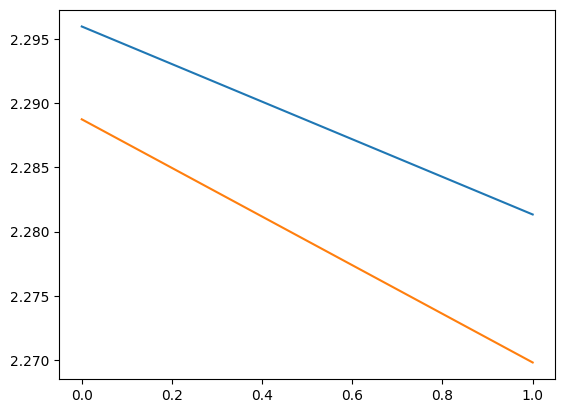

Starting epoch number 2


100%|██████████| 20/20 [00:06<00:00,  2.98it/s]


At epoch #2, loss = 2.258868384361267


100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


At epoch #2, validation loss = 2.241958665847778


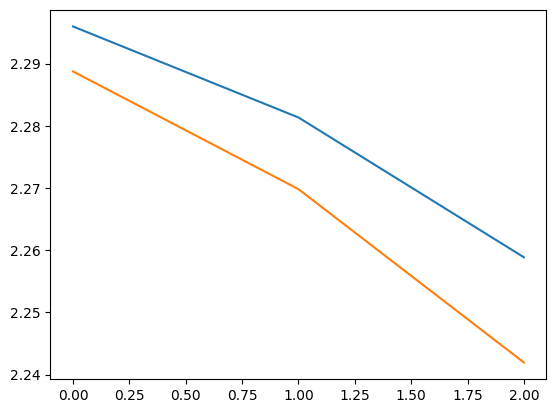

Starting epoch number 3


100%|██████████| 20/20 [00:08<00:00,  2.45it/s]


At epoch #3, loss = 2.227965426445007


100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

At epoch #3, validation loss = 2.208209705352783


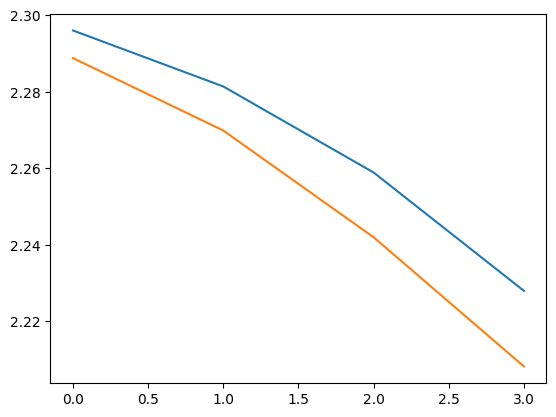

Starting epoch number 4


100%|██████████| 20/20 [00:06<00:00,  3.19it/s]


At epoch #4, loss = 2.1947567939758303


100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


At epoch #4, validation loss = 2.1766210556030274


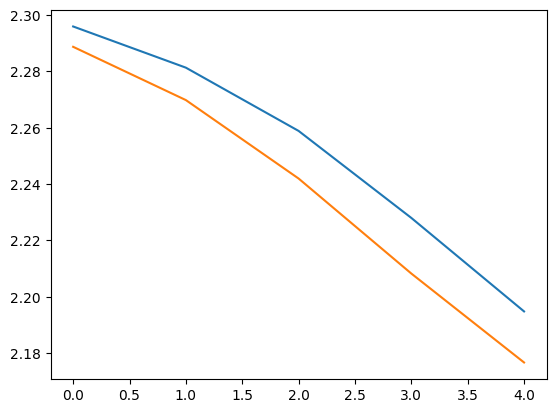

Starting epoch number 5


100%|██████████| 20/20 [00:08<00:00,  2.47it/s]


At epoch #5, loss = 2.167346882820129


100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

At epoch #5, validation loss = 2.1537107944488527


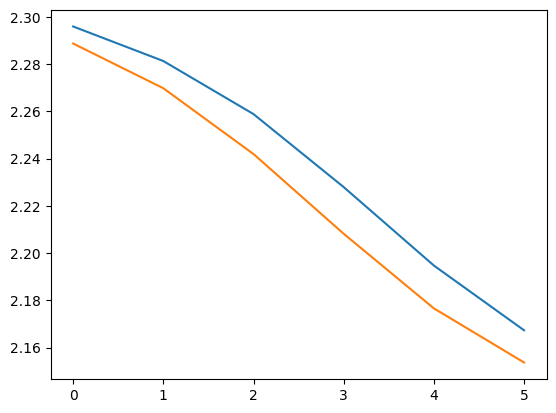

Starting epoch number 6


100%|██████████| 20/20 [00:08<00:00,  2.50it/s]


At epoch #6, loss = 2.147980570793152


100%|██████████| 5/5 [00:01<00:00,  3.13it/s]


At epoch #6, validation loss = 2.1368799686431883


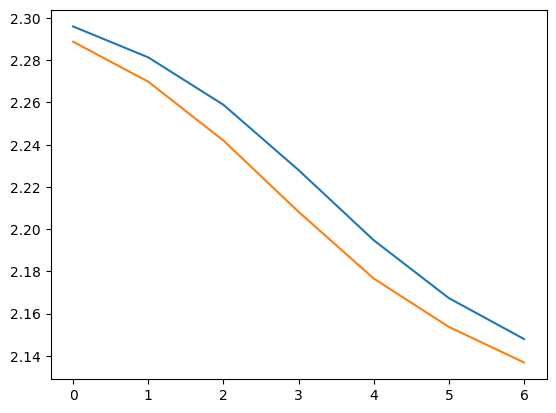

Starting epoch number 7


100%|██████████| 20/20 [00:06<00:00,  3.14it/s]


At epoch #7, loss = 2.133318650722504


100%|██████████| 5/5 [00:01<00:00,  2.52it/s]


At epoch #7, validation loss = 2.1264356136322022


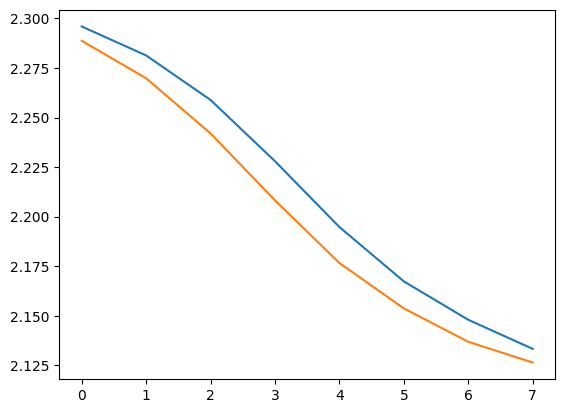

Starting epoch number 8


100%|██████████| 20/20 [00:07<00:00,  2.52it/s]


At epoch #8, loss = 2.1227460622787473


100%|██████████| 5/5 [00:01<00:00,  3.07it/s]


At epoch #8, validation loss = 2.115537118911743


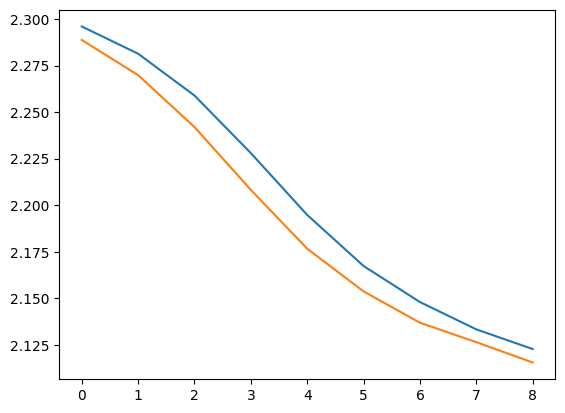

Starting epoch number 9


100%|██████████| 20/20 [00:07<00:00,  2.56it/s]


At epoch #9, loss = 2.112920272350311


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

At epoch #9, validation loss = 2.1095409870147703


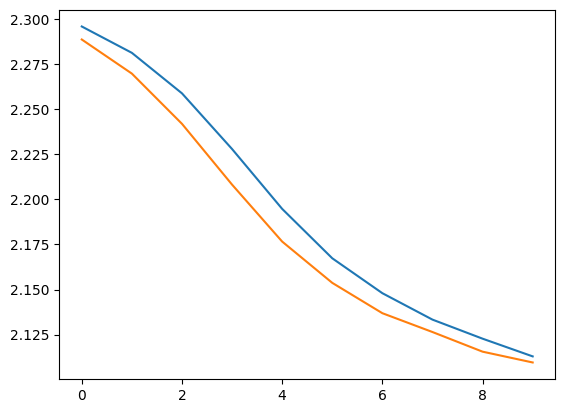

In [67]:
classification_training(train_loader_cifar, val_loader_cifar, 'cifar10', model_classification_cifar10)

Starting epoch number 0


100%|██████████| 5/5 [01:01<00:00, 12.23s/it]


At epoch #0, loss = 2.301054668426514


100%|██████████| 1/1 [00:12<00:00, 12.70s/it]


At epoch #0, validation loss = 2.2994298934936523
Starting epoch number 1


100%|██████████| 5/5 [00:59<00:00, 11.91s/it]


At epoch #1, loss = 2.296173667907715


100%|██████████| 1/1 [00:12<00:00, 12.87s/it]

At epoch #1, validation loss = 2.2956619262695312


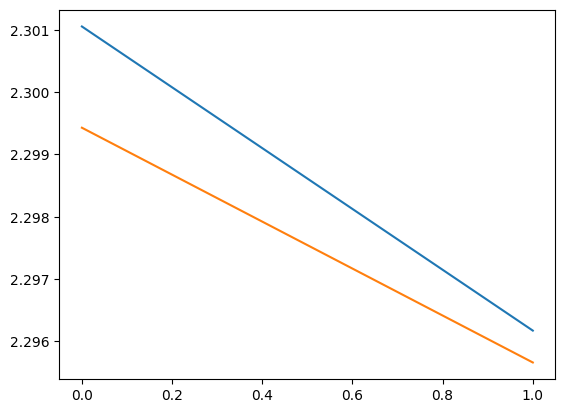

Starting epoch number 2


100%|██████████| 5/5 [00:59<00:00, 11.86s/it]


At epoch #2, loss = 2.291822576522827


100%|██████████| 1/1 [00:12<00:00, 12.38s/it]

At epoch #2, validation loss = 2.2924108505249023


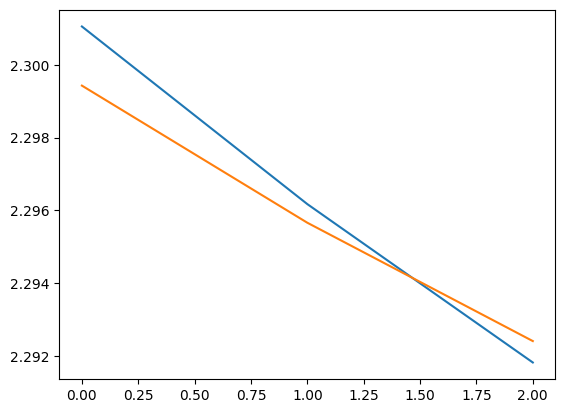

Starting epoch number 3


100%|██████████| 5/5 [01:00<00:00, 12.13s/it]


At epoch #3, loss = 2.287247085571289


100%|██████████| 1/1 [00:12<00:00, 12.52s/it]

At epoch #3, validation loss = 2.2888548374176025


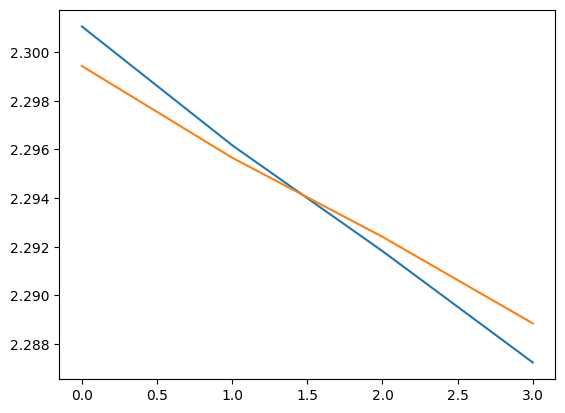

Starting epoch number 4


100%|██████████| 5/5 [01:00<00:00, 12.08s/it]


At epoch #4, loss = 2.2825404167175294


100%|██████████| 1/1 [00:12<00:00, 12.55s/it]


At epoch #4, validation loss = 2.2834672927856445


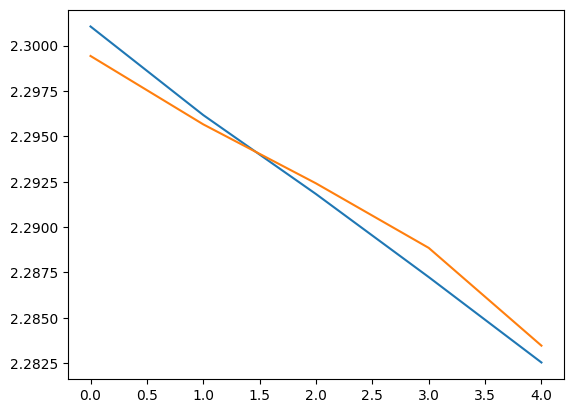

Starting epoch number 5


100%|██████████| 5/5 [01:00<00:00, 12.00s/it]


At epoch #5, loss = 2.27677435874939


100%|██████████| 1/1 [00:12<00:00, 12.71s/it]

At epoch #5, validation loss = 2.275531530380249


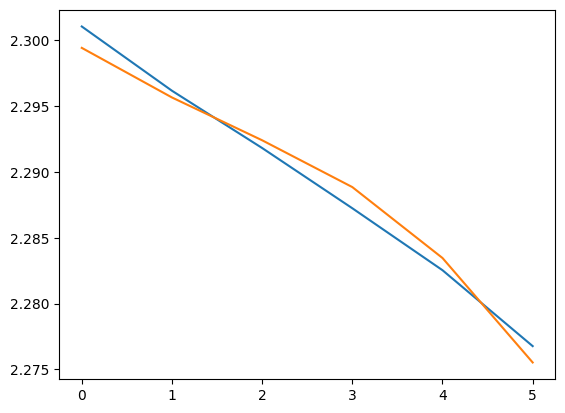

Starting epoch number 6


100%|██████████| 5/5 [01:01<00:00, 12.23s/it]


At epoch #6, loss = 2.2705379009246824


100%|██████████| 1/1 [00:12<00:00, 12.48s/it]

At epoch #6, validation loss = 2.267974853515625


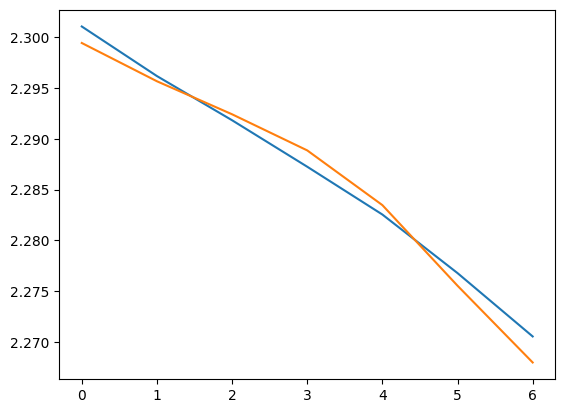

Starting epoch number 7


100%|██████████| 5/5 [01:00<00:00, 12.09s/it]


At epoch #7, loss = 2.2624215602874753


100%|██████████| 1/1 [00:12<00:00, 12.55s/it]


At epoch #7, validation loss = 2.2602524757385254


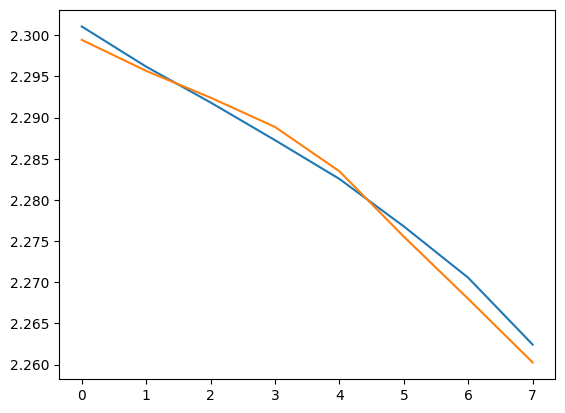

Starting epoch number 8


100%|██████████| 5/5 [01:02<00:00, 12.50s/it]


At epoch #8, loss = 2.253086042404175


100%|██████████| 1/1 [00:12<00:00, 12.92s/it]


At epoch #8, validation loss = 2.253133773803711


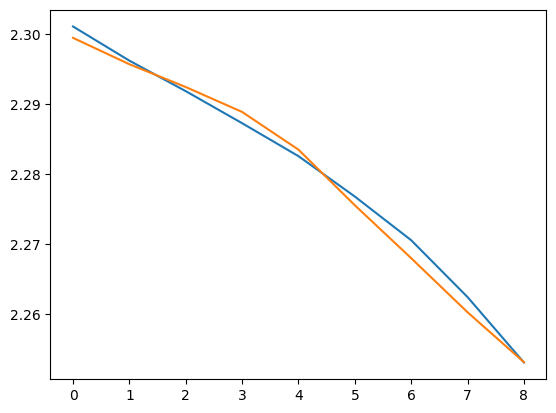

Starting epoch number 9


100%|██████████| 5/5 [01:00<00:00, 12.14s/it]


At epoch #9, loss = 2.2435673236846925


100%|██████████| 1/1 [00:12<00:00, 12.65s/it]

At epoch #9, validation loss = 2.2416484355926514


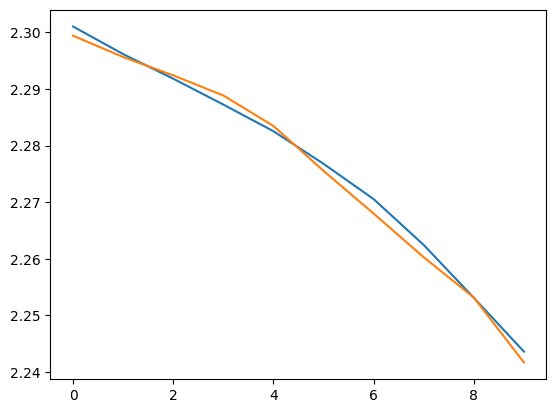

In [68]:
classification_training(train_loader_imagenet10, val_loader_imagenet10, 'imagenet10', model_classification_imagenet10)

In [73]:
def evaluation(model, loader):
    model.eval()
    validation_loss = 0.0
    correct_top1 = 0
    correct_top5 = 0
    total_samples = 0

    with torch.no_grad():
        for i, (images, labels) in enumerate(tqdm(loader)):
            images = images.to(device)
            labels = labels.to(device)
            samples += labels.size(0)

            outputs = model(images)

            _, pred_top1 = outputs.topk(1, dim=1)
            true_top1 += (pred_top1 == labels.view(-1, 1)).sum().item()

            _, pred_top5 = outputs.topk(5, dim=1)
            true_top5 += pred_top5.eq(labels.view(-1, 1).expand_as(pred_top5)).sum().item()

    acc1 = 100.0 * true_top1 / samples
    acc5 = 100.0 * true_top5 / samples

    return acc1, acc5

100%|██████████| 5/5 [00:01<00:00,  3.43it/s]


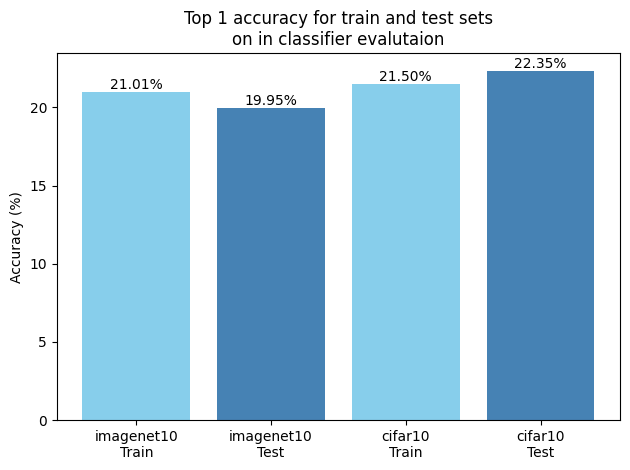

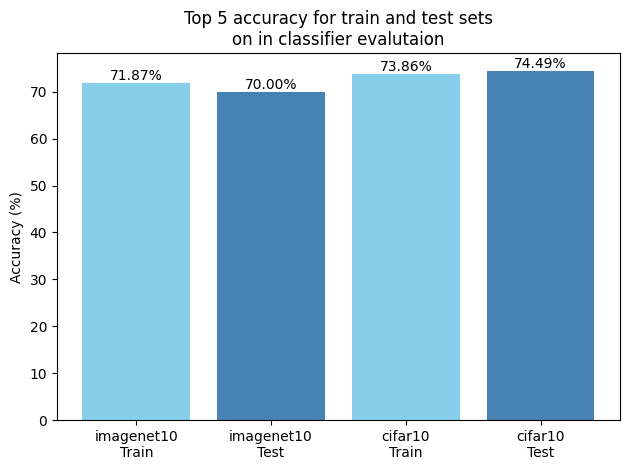

In [78]:
def plot_evaluation_2(dataset):
    acc1_train_imagenet10, acc5_train_imagenet10 = evaluation(model_classification_imagenet10, train_loader_imagenet10)
    acc1_test_imagenet10, acc5_test_imagenet10 = evaluation(model_classification_imagenet10, test_loader_imagenet10)

    acc1_train_cifar, acc5_train_cifar = evaluation(model_classification_cifar10, train_loader_cifar)
    acc1_test_cifar, acc5_test_cifar = evaluation(model_classification_cifar10, test_loader_cifar)

    values_acc1 = [acc1_train_imagenet10, acc1_test_imagenet10,
                  acc1_train_cifar, acc1_test_cifar]

    values_acc5 = [acc5_train_imagenet10, acc5_test_imagenet10,
                  acc5_train_cifar, acc5_test_cifar]

    labels = ['imagenet10\nTrain', 'imagenet10\nTest',
              'cifar10\nTrain', 'cifar10\nTest']

    plot_results(values_acc1, labels, 1, dataset)
    plot_results(values_acc5, labels, 5, dataset)

plot_evaluation_2('in classifier evalutaion')

## Other Tasks
In addition to the above tasks, prior work has also investigated other self-superivsed tasks such as solving jigsaw puzzles [[4]](https://arxiv.org/abs/1603.09246), cycle-consistency [[5]](https://arxiv.org/abs/1903.07593), contrastive learning [[6]](https://arxiv.org/abs/1807.03748)[[7]](https://arxiv.org/abs/1905.09272)[[8]](https://arxiv.org/abs/1906.05849)[[9]](https://arxiv.org/abs/1911.05722), and patch prediction [[10]](https://arxiv.org/abs/1505.05192). See [here](https://github.com/jason718/awesome-self-supervised-learning) for a great resource on more self-supervised learning papers.

# Demo 4: Using Representations for Downstream Tasks

After pretraining a model on a self-supervised learning task, we can use it for other downstream tasks. In this demo, we use the pre-trained ResNet50 backbone from training SimCLR on a subset of ImageNet to learn a semantic segmentation model on Pascal VOC 2012. We use a simple U-Net [[11]](https://arxiv.org/abs/1505.04597) architecture with skip connections across feature maps between the SimCLR encoder and learned upsampling decoder. We do not fine-tune the SimCLR ResNet50 backbone, and only optimize the upsampling portion.

![](https://drive.google.com/uc?id=19dxxcwof0IA0jyv0VCl4rnZZf3ajA22s)

The training script can be found in `train_segmentation.py` [here](https://github.com/wilson1yan/cs294-158-ssl/blob/master/train_segmentation.py).

## Example Code

In [ ]:
# Code adapted from https://github.com/qubvel/segmentation_models.pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F
from deepul_helper.resnet import NormReLU

class SegmentationModel(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, n_classes):
        super().__init__()

        decoder_channels = (512, 256, 128, 64, 32)
        encoder_channels = (2048, 1024, 512, 256, 64) # Starting from head (resnet 50)

        # Construct decoder blocks
        in_channels = [encoder_channels[0]] + list(decoder_channels[:-1])
        skip_channels = list(encoder_channels[1:]) + [0]
        out_channels = decoder_channels
        blocks = [
            DecoderBlock(in_ch, skip_ch, out_ch)
            for in_ch, skip_ch, out_ch in zip(in_channels, skip_channels, out_channels)
        ]
        self.dec_blocks = nn.ModuleList(blocks)

        # Segmentation head for output prediction
        self.seg_head = nn.Conv2d(decoder_channels[-1], n_classes, kernel_size=3, padding=1)

    def forward(self, features, targets):
        features = features[1:] # remove first skip with same spatial resolution
        features = features[::-1] # reverse channels to start from head of encoder

        skips = features[1:]
        x = features[0]
        for i, decoder_block in enumerate(self.dec_blocks):
            skip = skips[i] if i < len(skips) else None
            x = decoder_block(x, skip)

        logits = self.seg_head(x)
        loss = F.cross_entropy(logits, targets)

        return dict(Loss=loss), logits


class DecoderBlock(nn.Module):
    def __init__(
            self,
            in_channels,
            skip_channels,
            out_channels,
    ):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels + skip_channels, out_channels,
                      kernel_size=3, padding=1),
            NormReLU((out_channels, None, None)), # only care about channel dim for BN
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            NormReLU((out_channels, None, None))
        )

    def forward(self, x, skip=None):
        x = F.interpolate(x, scale_factor=2, mode="nearest")
        if skip is not None:
            x = torch.cat([x, skip], dim=1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x

## Segmentation Results
Below, we show a random subset of segmentations from the trained model. Every set of 3 images consists of the original image, the labeled segmentation, and the predicted segmentation.

In [ ]:
from deepul_helper.demos import show_segmentation
show_segmentation()

# Demo 5: Avoiding Trivial Representations in Self-Supervised Tasks

When designing a self-supervised learning task, it is important to make sure that no trivial solutions exists. In general, a learned solution is trivial if the model is able to successfully complete its task by taking advantage of low-level features. As a result, it doesn't learn a good representation so downstream performance is bad.

For example, in the jigsaw [[4]](https://arxiv.org/abs/1603.09246) task, a model can "cheat" by just looking at the boundary textures of the jigsaw pieces, or following and matching straight lines across different pieces. These issues can generally be fixed by ranndom cropping, shifting, and spacially jittering.

We look at two other less obvious aspects of images that may reduce performance.

## Chromatic Aberration

Chromatic aberration occurs when the different focal lengths of light results in the light not meeting all at the same point.
![from wikipedia](https://drive.google.com/uc?id=1PYGoQWnH0aAeiE_8t4ef5WDcq1UIQQ5t)

A example of very apparent chromatic aberration is shown below, where the green and magenta colors are clearly offset with each other:

![](https://drive.google.com/uc?id=1M1B6kV6ddBwyJse3FQT8_XBTeqs5s5WL)

Chromatic aberration generally becomes a problem in patch-based self-supervised learning tasks that design, such as solving jigsaw puzzles, or predicintg the correct location of a patch in an image In this case, the model can take advantage of the low-level chromatic aberration features to get a strong idea of where the patch is located without understanding the actual context.

Below is a quick demo of chromatic aberration in more realistic images, and possible fixes. Note that in general, chromatic aberration is fairly hard to spot with the naked eye, but deep learning models are still able to use it to their advantage.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# You can see some chromatic aberration in the purple fringes around the branches

image = Image.open('sample_images/chrom_ab_demo.png')
plt.figure()
plt.axis('off')
plt.imshow(image)
plt.show()

Chromatic aberration is generally fixed through conversion to grayscale, or color dropping. Color dropping works by dropping 2 of the color channels and replacing them with random noise uniform or Gaussian noise.

In [ ]:
import numpy as np

# Color Dropping
# We will drop all channels except R
image_cpy = image.copy()
pixels = image_cpy.load()

arr = np.array(image_cpy)
std_R = np.std(arr[:, :, 0])
mean_G, mean_B = np.mean(arr[:, :, 1]), np.mean(arr[:, :, 2])

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j] # (R, G, B, A)
    R, A = p[0], p[3]
    G = int(np.random.randn() * std_R + mean_G)
    B = int(np.random.randn() * std_R + mean_B)
    pixels[i, j] = (R, G, p[2], p[3])

plt.figure()
plt.title('Color Dropping')
plt.axis('off')
plt.imshow(image_cpy)
plt.show()

# Grayscale
image_cpy2 = image.copy()
pixels2 = image_cpy2.load()

for i in range(image.size[0]):
  for j in range(image.size[1]):
    p = pixels[i, j]
    G = int(0.3 * p[0] + 0.59 * p[1] + 0.11 * p[2])
    pixels2[i, j] = (G, G, G, 255)

plt.figure()
plt.title('Grayscale')
plt.axis('off')
plt.imshow(image_cpy2)
plt.show()

## Color Intensity Histograms

In the SimCLR paper, the authors show that the histogram of color intensities of different patches within the same image have very similar histograms, which may degrade training by encouraging models to look at low-level (pixel intensity) features to solve self-supervised tasks that involve matching positive patches of the same image.

Below, we run a similar demo to what was demonstrated in the paper

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Original Image')
plt.axis('off')
plt.imshow(image)
plt.show()

In [ ]:
import numpy as np
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()

Now we apply color jittering to mitigate this effect

In [ ]:
from torchvision import transforms

color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)
jitter_img = color_jitter(image)

image = Image.open('sample_images/n01537544_19414.JPEG')
plt.figure()
plt.title('Color Jittered Image')
plt.axis('off')
plt.imshow(jitter_img)
plt.show()

In [ ]:
arr = np.array(image)
H, W, _ = arr.shape

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  r = np.random.randint(0, H - 128)
  c = np.random.randint(0, W - 128)
  patch = arr[r:r+128, c:c+128]

  axs[i].set_title(f'Patch {i}')
  axs[i].hist(patch.reshape(-1), bins=50)
plt.show()